In [2]:

import seaborn as sns
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import csv

In [3]:
df = pd.read_csv('../../data/cleaned_data.csv')

In [4]:
val_counts = df['STATUS'].value_counts()
print(val_counts)

frac_dropped = val_counts['Selected, dropped out'] / (val_counts['Selected, dropped out'] + val_counts['Selected'])
print(frac_dropped)

Not selected             5136
Selected                  717
Selected, dropped out      74
Name: STATUS, dtype: int64
0.09355246523388117


In [5]:
df.groupby('DATA_ID')['STATUS'].value_counts()

DATA_ID  STATUS               
AAZ      Not selected             336
         Selected                  36
         Selected, dropped out      1
ABA      Not selected             141
         Selected                  33
                                 ... 
ACA      Selected                  34
         Selected, dropped out      1
ACB      Not selected             132
         Selected                  28
         Selected, dropped out      5
Name: STATUS, Length: 61, dtype: int64

In [6]:
# dataset ALDFC
feature_list = ["AGE", "GENDER", "INDIGENOUS", "RACIAL_MINORITY", "HOUSING"]
datasets = ["ABS", "ABP", "ABU", "ABQ", "ABI", "ABG"]
for dataset in datasets:
    filtered_df = df[df["DATA_ID"] == dataset]
    filtered_df.loc[:, "Initially Selected"] = np.where(filtered_df["STATUS"] != "Not selected", "YES", "NO")
    filtered_df = filtered_df.dropna(subset=feature_list, axis=0)
    filtered_df = filtered_df.dropna(axis=1)
    filtered_df.loc[:, "Dropped"] = np.where(filtered_df["STATUS"] == "Selected, dropped out", "YES", 
                                      np.where(filtered_df["STATUS"] == "Selected", "NO", np.nan))
    filtered_df = filtered_df.drop(columns=["STATUS", "DATA_ID"])
    filtered_df.to_csv(f"../../data/MASS/{dataset}/{dataset}_cleaned.csv", index=False)

/var/folders/58/knm7y6mn4gg1h30vr3krd6br0000gn/T/ipykernel_63693/3944407090.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, "Initially Selected"] = np.where(filtered_df["STATUS"] != "Not selected", "YES", "NO")


OSError: Cannot save file into a non-existent directory: '../../data/MASS/ABS'

In [9]:
# dataset ALDFN
feature_list = ["AGE", "GENDER", "INDIGENOUS", "RACIAL_MINORITY", "INCOME-PROXY-STRONG"]
datasets = ["ACB", "ABZ", "ACA", "ABY"]

mass_age_mapping = {
    1: "Young Adult",
    2: "Middle Age",
    3: "Middle Age",
    4: "Retirement Age",
    5: "Retirement Age"
}

for dataset in datasets:
    filtered_df = df[df["DATA_ID"] == dataset]
    filtered_df.loc[:, "Initially Selected"] = np.where(filtered_df["STATUS"] != "Not selected", "YES", "NO")
    filtered_df = filtered_df.dropna(subset=feature_list, axis=0)
    filtered_df = filtered_df.dropna(axis=1)
    filtered_df['AGE'] = filtered_df['AGE'].map(mass_age_mapping)
    filtered_df["Dropped"] = np.where(filtered_df["STATUS"] == "Selected, dropped out", "YES", 
                                      np.where(filtered_df["STATUS"] == "Selected", "NO", np.nan))
    filtered_df = filtered_df[feature_list + ['Code', 'Initially Selected', 'Dropped']]
    filtered_df = filtered_df.rename(columns={"INCOME-PROXY-STRONG": "INCOME"})
    filtered_df.to_csv(f"../../data/Mass_ALDFN/{dataset}/{dataset}_cleaned.csv", index=False)

/var/folders/58/knm7y6mn4gg1h30vr3krd6br0000gn/T/ipykernel_63693/4104154823.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, "Initially Selected"] = np.where(filtered_df["STATUS"] != "Not selected", "YES", "NO")
/var/folders/58/knm7y6mn4gg1h30vr3krd6br0000gn/T/ipykernel_63693/4104154823.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, "Initially Selected"] = np.where(filtered_df["STATUS"] != "Not selected", "YES", "NO")
/var/folders/58/knm7y6mn4gg1h30vr3krd6br00

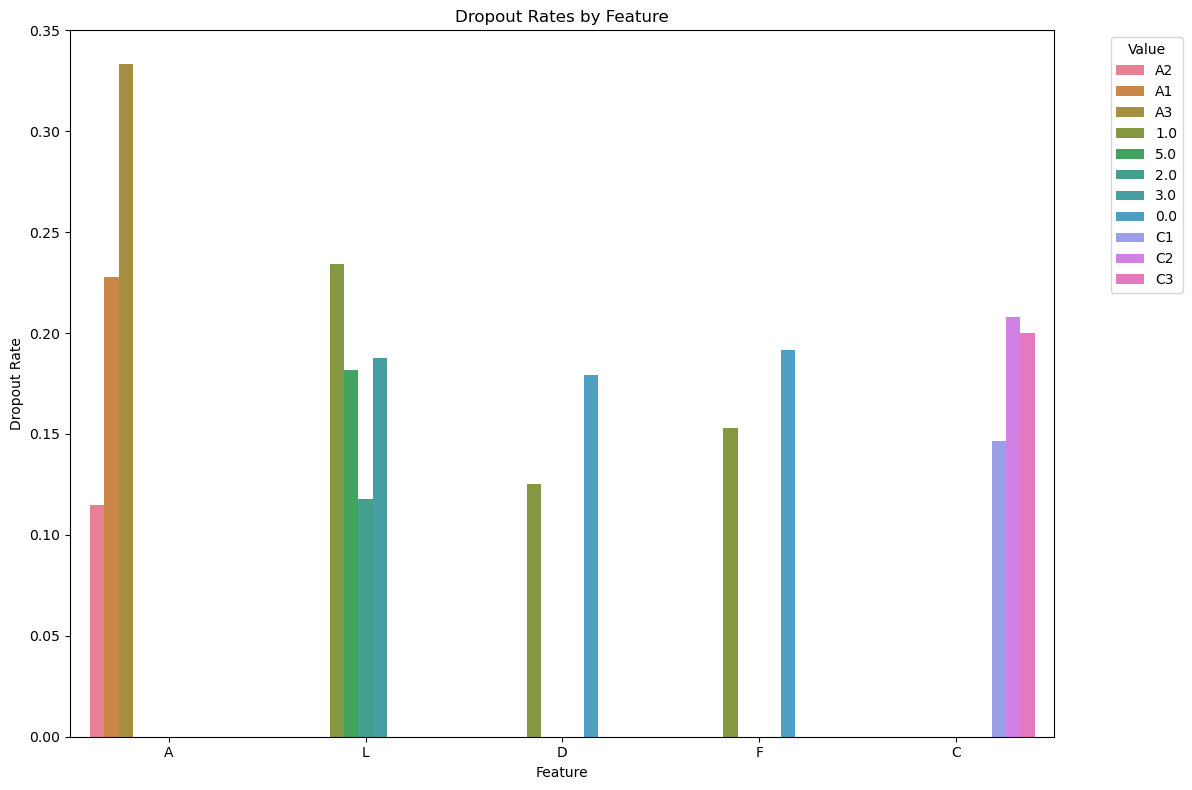

In [31]:
# dropout_rates = {}
# combined_df = combined_df[combined_df["STATUS"] != "Not selected"]
# for feature in feature_list:
#     feature_values = combined_df[feature].unique()
#     dropout_rates[feature] = {}
#     for value in feature_values:
#         subset = combined_df[(combined_df[feature] == value)]
#         dropout_rate = subset["STATUS"].value_counts(normalize=True).get("Selected, dropped out", 0)
#         dropout_rates[feature][value] = dropout_rate
# dropout_rates
#     # Prepare data for plotting
# plot_data = []
# for feature, values in dropout_rates.items():
#     for value, rate in values.items():
#         plot_data.append([feature, value, rate])

# df = pd.DataFrame(plot_data, columns=["Feature", "Value", "Dropout Rate"])

# # Plot clustered bar chart
# plt.figure(figsize=(12, 8))
# sns.barplot(x="Feature", y="Dropout Rate", hue="Value", data=df)
# plt.title("Dropout Rates by Feature")
# plt.xlabel("Feature")
# plt.ylabel("Dropout Rate")
# plt.legend(title="Value", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.savefig("../plots/dropout_rates_by_feature.png")
# plt.show()

In [32]:
dropout_rates

{'A': {'A2': 0.11504424778761062,
  'A1': 0.22764227642276422,
  'A3': 0.3333333333333333},
 'L': {1.0: 0.23404255319148937,
  5.0: 0.18181818181818182,
  2.0: 0.11764705882352941,
  3.0: 0.1875},
 'D': {0.0: 0.17937219730941703, 1.0: 0.125},
 'F': {0.0: 0.19148936170212766, 1.0: 0.15306122448979592},
 'C': {'C1': 0.14666666666666667, 'C2': 0.2077922077922078, 'C3': 0.2, nan: 0}}